**Classification with SVM**

Import lib



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


Useful function to plot boundaries

In [3]:
def plot_boundary(clf, X, y):
    """
    Function to plot a boundary decision
    """
    h = 0.05
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, s = 100)
    plt.title('score : ' + str(clf.score(X,y)))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')



Generate a separable training set and visualize it

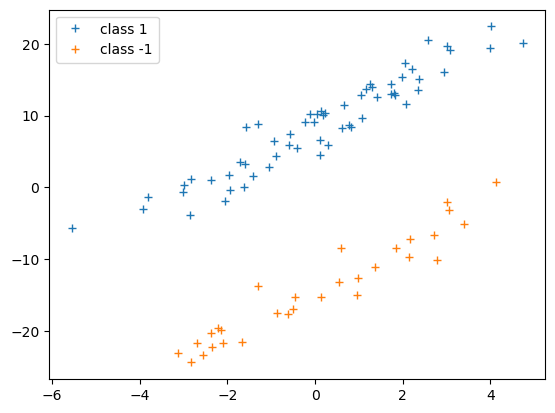

In [4]:
N=30 #number of data
X1=2*np.random.randn(N*2,1)
Y1 = 3*X1+8+np.random.randn(N*2,1)*2
C1=np.ones([N*2,1])

X2=2*np.random.randn(N,1)
Y2 = 3*X2-15-np.random.randn(N,1)*2
C2=-np.ones([N,1])
plt.plot(X1,Y1,'+')
plt.plot(X2,Y2,'+')
plt.legend(['class 1','class -1'])



Apply a linear classifier

training scores: 1.0


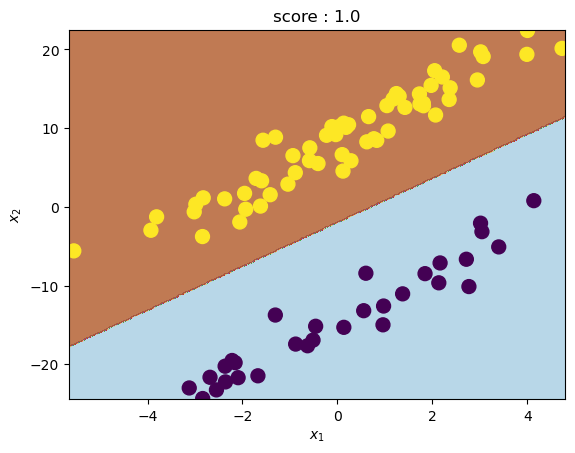

In [5]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons
clf = LinearSVC(C=0.1)

X = np.concatenate((np.concatenate((X1,X2),axis=0),np.concatenate((Y1,Y2),axis=0)),axis=1)
y = np.concatenate((np.ones((N*2,)),-np.ones((N,))))

clf.fit(X,y)
print("training scores:",clf.score(X,y))
plot_boundary(clf,X,y)
plt.savefig('linear_SVC.png')



### Noisy data

Generate moire noise

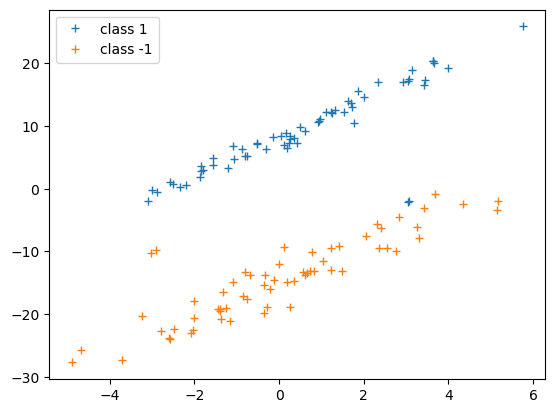

In [6]:
N=30 #number of data
Nnoise=2
X1=2*np.random.randn(N*2,1)
Y1 = 3*X1+8+np.random.randn(N*2,1)
X1n=np.random.randn(Nnoise,1)*0.1+3
Y1n = np.random.randn(Nnoise,1)*0.2 -2
X1 = np.concatenate((np.concatenate((X1,X1n),axis=0),np.concatenate((Y1,Y1n),axis=0)),axis=1)
C1=np.ones([N*2+Nnoise,1])

X2=2*np.random.randn(N*2,1)
Y2 = 3*X2-15-np.random.randn(N*2,1)*2
X2n=np.random.randn(Nnoise,1)*0.1-3
Y2n = np.random.randn(Nnoise,1)*0.3 -10
X2 = np.concatenate((np.concatenate((X2,X2n),axis=0),np.concatenate((Y2,Y2n),axis=0)),axis=1)

C2=-np.ones([N*2+Nnoise,1])
plt.plot(X1[:,0],X1[:,1],'+')
plt.plot(X2[:,0],X2[:,1],'+')
plt.legend(['class 1','class -1'])



C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ariol\Documents\documents\CDE\UBS\JupyterEnvironment\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


training scores: 0.9758064516129032


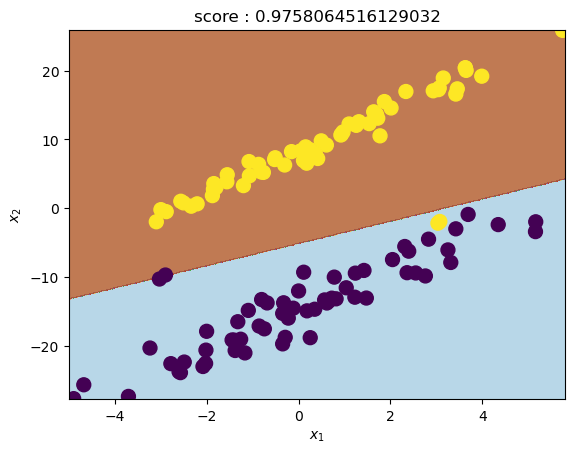

In [7]:
clf = LinearSVC(C=10000) # large C : original SVM without soft margin
X=np.concatenate((X1,X2))
y=np.concatenate((C1,C2))
clf.fit(X,y)
print("training scores:",clf.score(X,y))
plot_boundary(clf,X,y)
plt.savefig('linear_noisy_data.png')





##With non linearly separable data

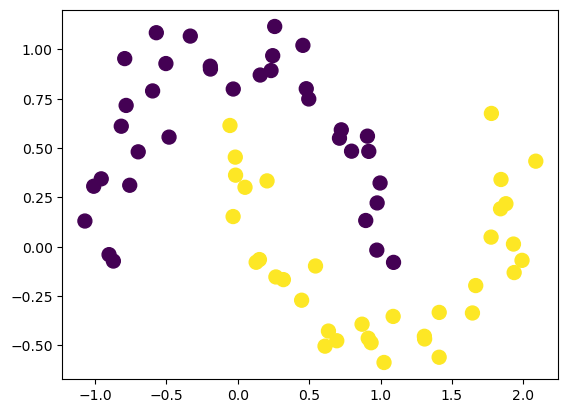

In [8]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons
# Creation of a training set
X, y = make_moons(noise = 0.1, random_state=1, n_samples=50)
plt.clf()
plt.scatter(X[:,0],X[:,1], c = y, s = 100)
plt.savefig('moon_train_data.png')
# Creation of a testing set
X_test, y_test = make_moons(noise = 0.1, random_state=321, n_samples=20)
plt.scatter(X_test[:,0],X_test[:,1], c = y_test, s = 100)
plt.savefig('moon_test_data.png')



Changing the $C$

training score: 0.76 . testing score: 0.8
training score: 0.76 . testing score: 0.8
training score: 0.84 . testing score: 0.8
training score: 0.86 . testing score: 0.8
training score: 0.84 . testing score: 0.8
training score: 0.84 . testing score: 0.85
training score: 0.84 . testing score: 0.85
training score: 0.84 . testing score: 0.85


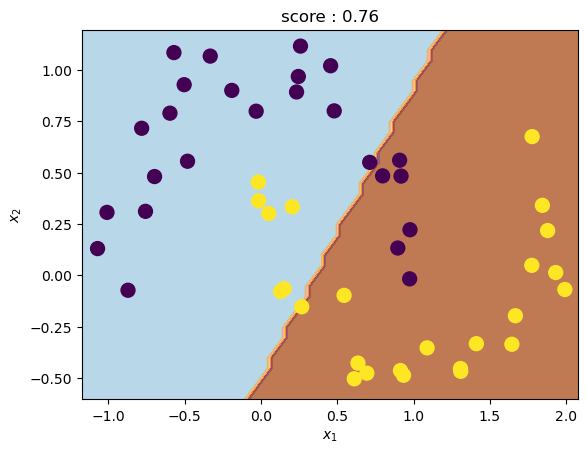

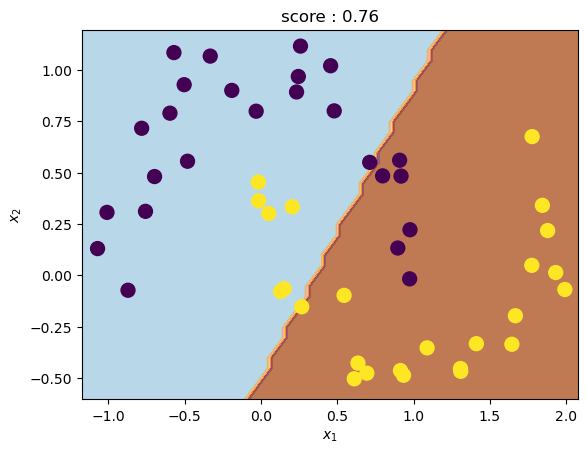

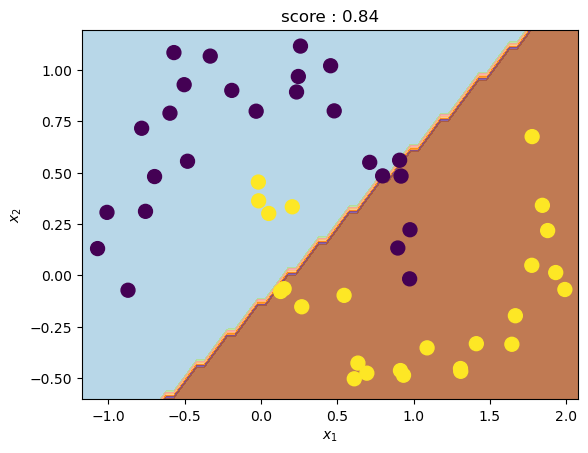

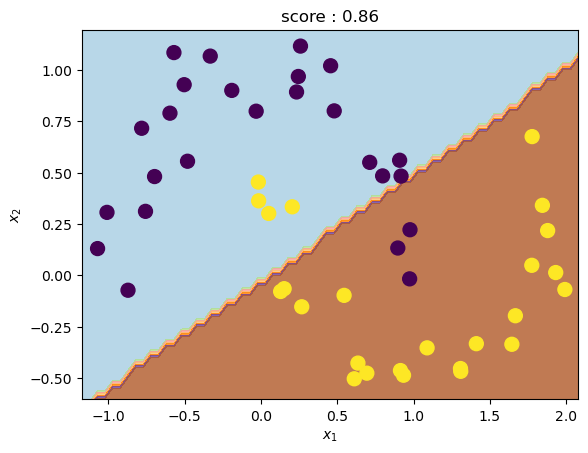

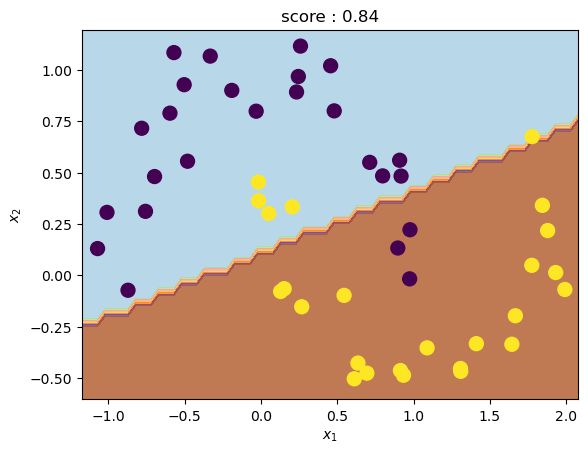

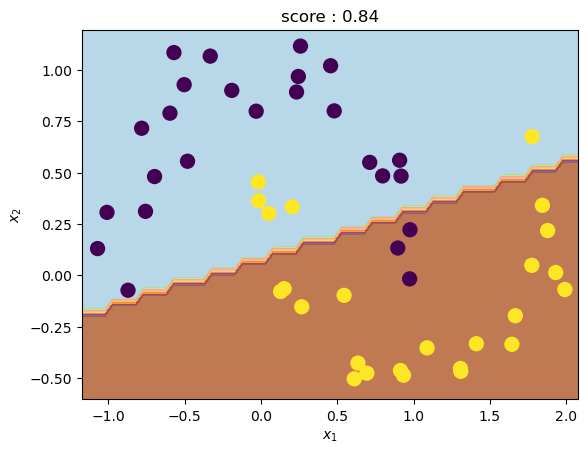

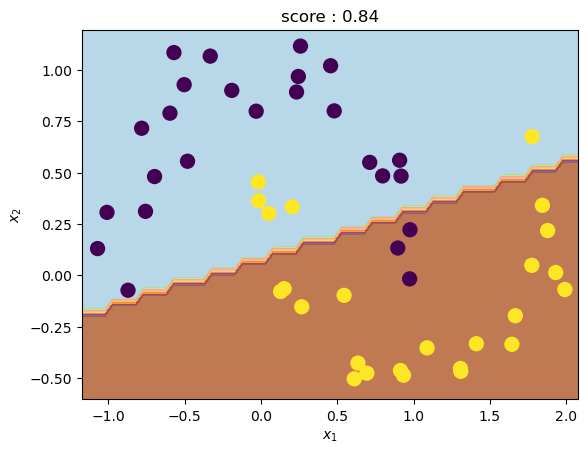

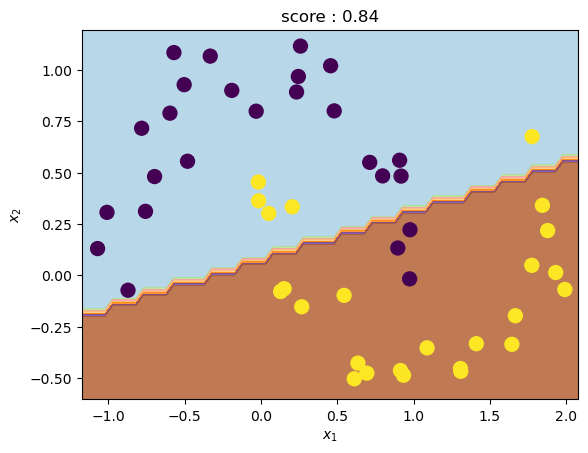

In [9]:
for C in [10**x for x in range(-3,5)]:
    clf = SVC(C=C, kernel='linear')
    clf.fit(X,y)
    print("training score:",clf.score(X,y), ". testing score:", clf.score(X_test,y_test))
    plot_boundary(clf,X,y)
    #plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c = 'green', s = 200, marker='*')
    plt.savefig('moon_linear_kernel_C_%.3f.png'%C)


Non linear kernel

training score: 0.72 . testing score: 0.7
training score: 0.78 . testing score: 0.75
training score: 0.86 . testing score: 0.85
training score: 0.98 . testing score: 0.9
training score: 1.0 . testing score: 1.0
training score: 1.0 . testing score: 1.0
training score: 1.0 . testing score: 1.0
training score: 1.0 . testing score: 1.0


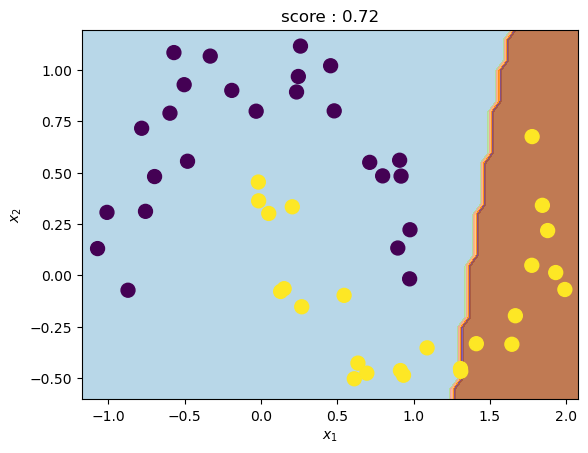

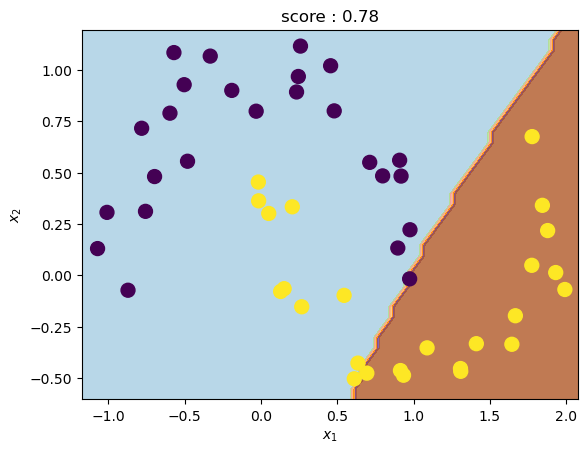

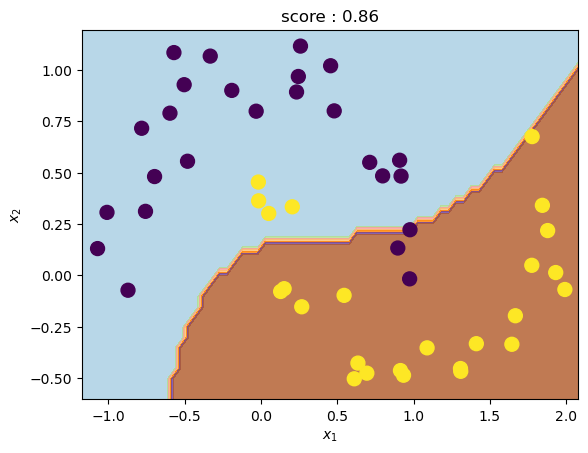

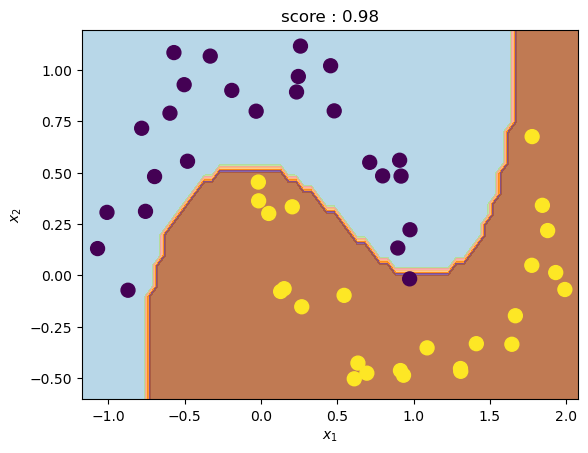

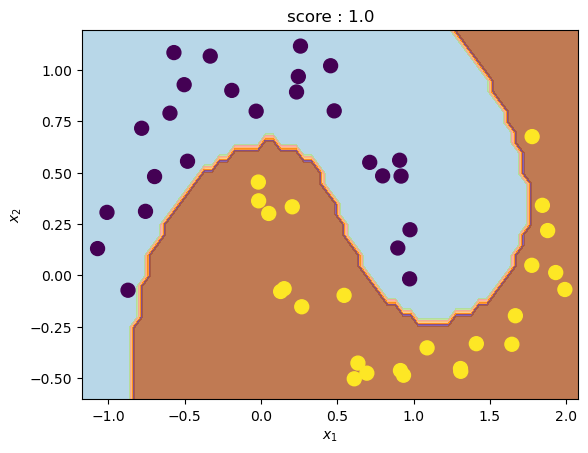

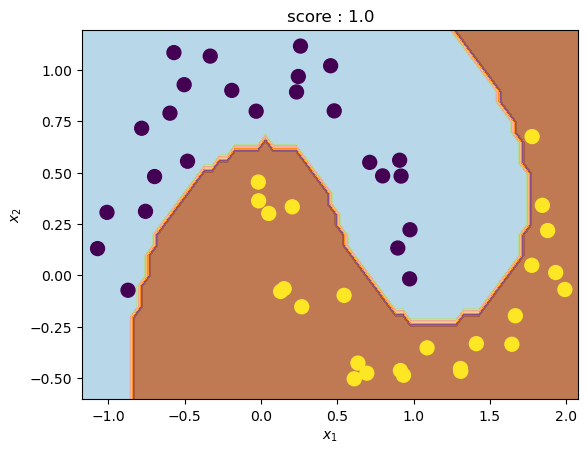

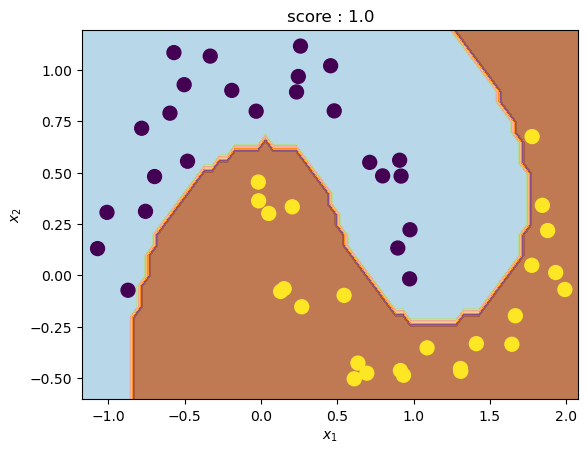

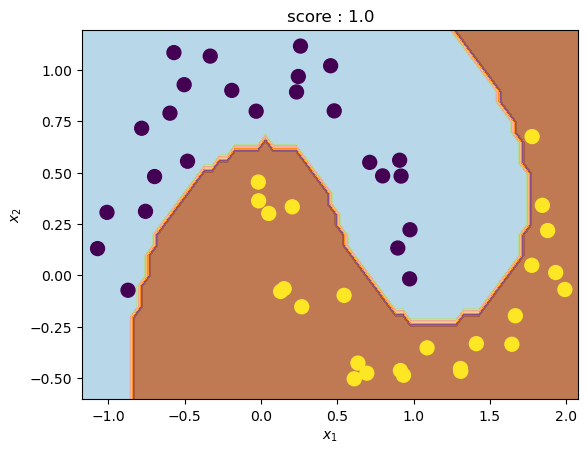

In [10]:
for C in [10**x for x in range(-3,5)]:
    clf = SVC(C=C, kernel='poly', degree = 3, coef0 = 1)
    clf.fit(X,y)
    print("training score:",clf.score(X,y), ". testing score:", clf.score(X_test,y_test))
    plot_boundary(clf,X,y)
    #plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c = 'green', s = 200, marker='*')
    plt.savefig('moon_polynomial_kernel_C_%.3f.png'%C)


training score: 1.0 . testing score: 1.0


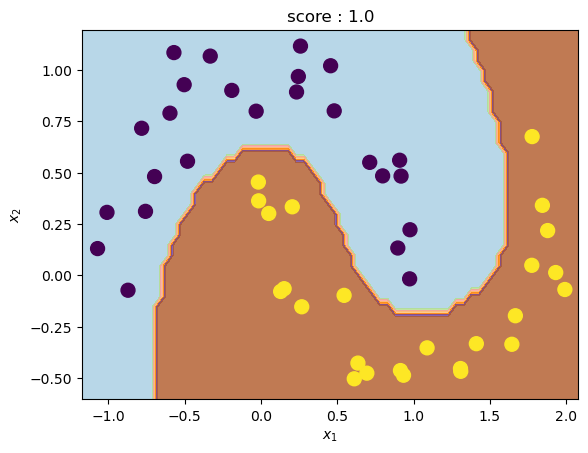

In [11]:
clf = SVC(C=C, kernel='rbf')
clf.fit(X,y)
print("training score:",clf.score(X,y), ". testing score:", clf.score(X_test,y_test))
plot_boundary(clf,X,y)
#plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c = 'green', s = 200, marker='*')
plt.savefig('moon_polynomial_kernel_C_%.3f.png'%C)